# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
missing_vals = df.isna().sum()
print("Missing values per column:\n", missing_vals)

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Goal is to compare the performance of the classifiers encountered, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. A dataset related to marketing bank products over the telephone will be used..

In [6]:
df_add = pd.read_csv('data/bank-additional/bank-additional.csv', sep = ';')
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
categorical_cols = [ 'job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'] # Replace with your column names
all_cols = ['age','job', 'marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','poutcome','y'] 

df_add[num_cols] = df_add[num_cols].apply(pd.to_numeric,errors='coerce')

y = pd.DataFrame(df_add['y'] )
df_add.info()
   

       y
0     no
1     no
2     no
3     no
4     no
...   ..
4114  no
4115  no
4116  no
4117  no
4118  no

[4119 rows x 1 columns]


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
pip install category-encoders

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
le = LabelEncoder()
enc = ce.CatBoostEncoder(cols=categorical_cols)
print(enc)

CatBoostEncoder(cols=['job', 'marital', 'education', 'default', 'housing',
                      'loan', 'contact', 'month', 'day_of_week', 'poutcome',
                      'y'])


## Encoding Categorical and Numeric values to be numeric for Models to accept clean data.

In [10]:
df_add_enc=pd.DataFrame()
print(df_add.shape)
print(y.shape)
df_add_enc[categorical_cols] = enc.fit_transform(df_add[categorical_cols],y)

#df_add_enc[categorical_cols] = df_add_enc[categorical_cols].apply(pd.to_numeric,errors='coerce')
print(df_add_enc)


(4119, 21)
(4119, 1)
           job   marital  education   default   housing      loan   contact  \
0     0.109493  0.109493   0.109493  0.109493  0.109493  0.109493  0.109493   
1     0.109493  0.109493   0.109493  0.054746  0.109493  0.054746  0.109493   
2     0.054746  0.054746   0.054746  0.036498  0.054746  0.036498  0.054746   
3     0.036498  0.036498   0.054746  0.027373  0.109493  0.109493  0.036498   
4     0.109493  0.027373   0.109493  0.021899  0.036498  0.027373  0.054746   
...        ...       ...        ...       ...       ...       ...       ...   
4114  0.131792  0.100562   0.075042  0.121447  0.110497  0.102420  0.141604   
4115  0.131661  0.100522   0.105784  0.121410  0.110446  0.111808  0.051881   
4116  0.233043  0.134644   0.105669  0.121373  0.109962  0.111775  0.141551   
4117  0.131531  0.100482   0.105554  0.121337  0.109902  0.111741  0.141497   
4118  0.092931  0.134527   0.105439  0.121300  0.110395  0.111708  0.141444   

         month  day_of_week  p

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_add_enc, y, test_size=0.2, random_state=42)
y_train.head()

,y
324,no
2350,no
1391,no
468,no
561,no


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [12]:
cls =tree.DecisionTreeClassifier()
cls.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.875, 'x[10] <= 0.082\ngini = 0.194\nsamples = 3295\nvalue = [2936, 359]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 2935\nvalue = [2935, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[10] <= 0.332\ngini = 0.006\nsamples = 360\nvalue = [1, 359]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[8] <= 0.082\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 358\nvalue = [0, 358]')]

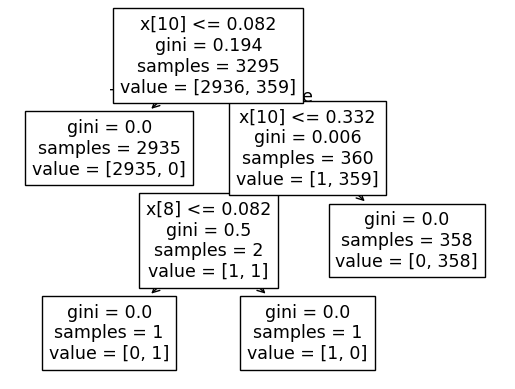

In [13]:
tree.plot_tree(cls)


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions